# **Lab 3: Iterative Methods**
**Edvin von Platen**

# **Abstract**

In this lab we implement, test, and evaluate the following fixed point iteration algorithms:

1. Jacobi Iteration,
2. Gauss-Seidel Iteration,
3. Newton's Method for Non-Linear Scalar Functions,
4. Newton's Method for System of Non-Linear Functions.

All implemented algorithms appear to be working as expected and performs quite well.

#**About the code**

In [0]:
"""This program is a template for lab reports in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2020 Edvin von Platen (edvinvp@kth.se)

# This file is part of the course DD2363 Methods in Scientific Computing
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This template is maintained by Johan Hoffman
# Please report problems to jhoffman@kth.se

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

To have access to the neccessary modules you have to run this cell. If you need additional modules, this is where you add them. 

In [0]:
# Load neccessary modules.
from google.colab import files

import time
import numpy as np
import unittest
import random

from matplotlib import pyplot as plt
from matplotlib import tri
from matplotlib import axes
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(seed=1994)
random.seed(1994)

# **Introduction**

We implement, test, and evaluate the following fixed point iteration algorithms:

1. Jacobi Iteration,
2. Gauss-Seidel Iteration,
3. Newton's Method for Non-Linear Scalar Functions,
4. Newton's Method for System of Non-Linear Functions.

All implementations and mathematical conccepts presented in this report are based on the lecture notes from the course [DD2363 Methods in Scientific Computing](https://kth.instructure.com/courses/17068). 

In the Methods section we present some general fixed point iteration, and background and implementation for each algrithm, including some unittest implementation. Followed by tests and evaluation in the Results section and a brief discussion of the results in the Discussion section

# **Methods**

## **Fixed Point Iteration**

In a fixed point iteration problem we want to solve, $x=g(x)$, by the iteration,
$$
x^{(k+1)} = g(x^{(k)}), \ \ \ \  (eq.\ \ 7.5).
$$
Where $g: X \to X$ is a nonlinear function or a linear transformation. If $X$ is a Banach space, i.e. complete normed vector space, and $x \mapsto g(x)$ satisfies some stability condition, the Banach fixed point theorem states that (7.5) will converge to the solution $x\in X$. We note that $R^n$ is a Banach space.

*Stationary* iterative methods are linear fixed point iteration of the form
$$
x^{(k+1)} = Mx^{(k)} + c, \ \ M \in R^{n\times n}, \ c \in R^{n},  \ x \in R^{n}, \ \ (eq. \ 7.6). 
$$
To solve a system of linear equations $Ax = b$ we can formulate it as a stationary fixed iteration by splitting $A$ into a sum $A = A_1 + A_2$, A_1 is easy to invert. Jacobi iteration and Gauss-Seidel are two stationary iterative methods based on splitting $A$ which we give an overview of and implement in the Methods section.

Stationary iteration methods does not always converge to the solution $x$, however it can be shown that Jacobi, and Gauss-Seidel iteration conveges if $A$ is diagonally dominant (section 7.3), i.e.
$$
|a_{ii}|  \geq \sum_{j\neq i} |a_{ij}|,
$$
and there exists at least one index $k$ such that,
$$
|a_{kk}| > \sum_{j\neq k} |a_{kj}|.
$$

We also need to decide when to stop the iteration, preferably when it has converged to the solution $x$. By Theorem 7.1 we know that the relative error for a sequence of approximate solutions of linear equations $Ax = b$ can be approximated by,

$$
\frac{\Vert e^{(k)} \Vert}{\Vert e^{(0)} \Vert} \leq \kappa(A) \frac{\Vert r^{(k)}\Vert}{\Vert r^{(0)}\Vert}.
$$
Where $\kappa(A) = \Vert A^{-1}\Vert \Vert A \Vert$ is the condition number of $A$, i.e. the maximum sensitivity in the solution with respect to a perturbed vector $\tilde{b} = b + \delta b$ (Section 7.3), and $e^{k} = x - x^{k}$ is the error for iteration $k$.

While we often cannot compute the exact error, and we don't want to compute the matix inverse (costly, and then we could just use it to solve the system!), we can compute the residual, which acts as a bound for the relative error. This bound can then be used as a stopping criterion for the iteration. We use the criterion given in section 7.3,
$$
\frac{\Vert r^{(k)} \Vert}{\Vert b \Vert}
$$
in the Jacobi- and Gauss-Seidel iteration implementations.


## **Jacobi Iteration**

The idea behind Jacobi iteration for solving the system of linear equations $Ax = b$ is to split the matrix $A$ by,
$$
A_1 = D, \ \  A_2 = A - D, \ \ \ (section\ 7.3),
$$
Where $D$ is the diagonal matrix which elements are the main diagonal of $A$. This gives us that,
\begin{align*}
Dx + Ax - Dx = b \iff Dx = -(A - D)x  + b \\
\iff x = -D^{-1}(A - D)x + D^{-1}b.
\end{align*}
I.e. the stationary fixed point iteration formula with $M = -D^{-1}(A - D)$, and $c = D^{-1}b$. 



Section 7.3 gives us the Jacobi iteration update formula, 
$$
x_i^{k+1} = a_{ii}^{-1}\left( b_i - \sum_{j\neq i}^n a_{ij}x_j^{(k)}\right),
$$
which we implement below.



In [0]:
def jacobi_iteration(A, b, x_start, TOL):
  # Store each iteration in a n x iters matrix so we can look at the residuals
  n,m = A.shape
  x = np.zeros((n,1))
  x[:,0] = x_start
  k = 1
  # While both x and b are column vectors A.dot(x) results in a row vector
  # So need to take transpose of b
  while np.linalg.norm(A.dot(x[:,k-1]) - b.T) / np.linalg.norm(b) > TOL:
    x = np.append(x, np.zeros((n,1)), axis=1)
    for i in range(n):
      s = 0
      for j in range(n):
        if j == i:
          continue
        s += A[i,j]*x[j,k-1]
      x[i,k] = 1/A[i,i]*b[i,0] - s*1/A[i,i]
    k += 1
  return x, k-1

class jacobi_iteration_test(unittest.TestCase):
  # We can test by comparing with np.linalg.solve.
  # We use only diagonally dominant matrices
  def test_random(self):
    # run 100 test with different dimensions
    for i in range(20):
      m = random.randint(50,100)
      A = np.random.randint(0,10, m * m)
      # make around 10% of the array non-zero
      A[A > 1] = 0
      A = np.reshape(A, (m,m))
      b = np.reshape(np.random.randint(0,10,m), (m,1))
      # Make sure Diagonally dominant
      for j in range(m):
        A[j,j] += 10 * np.random.randint(1,5)
      x,k = jacobi_iteration(A,b,np.zeros(m), 0.00001)
      x_j = np.reshape(x[:,k], (m,1))
      x_np = np.linalg.solve(A,b)
      self.assertIs(np.allclose(x_np,x_j,atol=1e-03), True)

## **Gauss-Seidel Iteration**
The difference between Gauss-Seidel iteration and Jacobi iteration is that in Gauss-Seidel we split $A = A_1 + A_2$ by $A_1 = L, \ A_2 = A - L$ (Section 7.3). Here, L is the lower triangular matrix obtained by zeroing all entries in $A$ above the main diagonal. This gives us that,
$$
(L + A - L)x = b \iff x = - L^{-1}(A - L)x + L^{-1}b.
$$
I.e. the stationary point iteration with $M = -L^{-1}(A-L)$ and $x = L^{-1}b$.
Which can be written as the following update formula given in section 7.3,
$$
x_i^{(k+1)} = a_{ii}^{-1} \left( b_i - \sum_{j<i} a_{ij}x_j^{(k+1)} - \sum_{j>i}a_{ij}x_j^{(k)} \right ),
$$
which we implement below.

In [0]:
def gauss_seidel_iteration(A, b, x_start, TOL):
  n,m = A.shape
  x = np.zeros((n,1))
  x[:,0] = x_start
  k = 1
  # While both x and b are column vectors A.dot(x) results in a row vector
  # So need to take transpose of b
  while np.linalg.norm(A.dot(x[:,k-1]) - b.T) / np.linalg.norm(b) > TOL:
    x = np.append(x, np.zeros((n,1)), axis=1)
    for i in range(n):
      s = 0
      for j in range(i):
        s += A[i,j]*x[j,k]
      for j in range(i+1,n):
        s += A[i,j]*x[j,k-1]
      x[i,k] = 1/A[i,i]*b[i,0] - s*1/A[i,i]
    k += 1
  return x, k-1

class gauss_seidel_iteration_test(unittest.TestCase):
  # We can test by comparing with np.linalg.solve.
  # We use only diagonally dominant matrices
  def test_random(self):
    # run 100 test with different dimensions
    for i in range(20):
      m = random.randint(50,100)
      A = np.random.randint(0,10, m * m)
      # make around 10% of the array non-zero
      A[A > 1] = 0
      A = np.reshape(A, (m,m))
      b = np.reshape(np.random.randint(0,10,m), (m,1))
      # Make sure Diagonally dominant
      for j in range(m):
        A[j,j] += 10 * np.random.randint(1,5)
      x,k = gauss_seidel_iteration(A,b,np.zeros(m), 0.00001)
      x_j = np.reshape(x[:,k], (m,1))
      x_np = np.linalg.solve(A,b)
      self.assertIs(np.allclose(x_np,x_j,atol=1e-03), True)

## **Newton's Method for Scalar Non-Linear Functions**

Newton's method for scalar non-linear functions is a fixed point iteration for solving,
$$
f(x) = 0, \ \ f : I \to R, \ \text{where } I \text{ is the interval for which we seek the solution } x\in R.
$$
Which can be formulated as the fixed point iteration,
$$
x^{(k+1)} = g(x^{(k)}) = x^{(k)} + \alpha f(x^{(k)}), \ \alpha \in R \ \ \ (eq. 8.2).
$$
It can be shown that (8.2) converges to a unique fixed point $x = g(x)$ if $g\in Lip(I)$, and $L_g < 1$, where $g \in Lip(I)$ means that $g$ is Lipschitz continous on $I$, i.e.
$$
|g(x) - g(y)|\leq L|x-y|, \ \forall x,y \in I, \ L > 0, \ L \in R,
$$
and $L_g$ is the Lipschitz constant $L$.

If we take $\alpha = f'(x^{(k)})^{-1}$ we get Newton's method. We implement algorithm 8.2 below with stopping criterion $|f(x^{(k)})| < TOL$. 

In [0]:
def newton_scalar(f,f_prim,start, TOL):
  x = np.zeros(1)
  x[0] = start
  k = 1
  while abs(f(x[k-1])) > TOL:
    x = np.append(x, x[k-1] - f(x[k-1])/f_prim(x[k-1]))
    k += 1
  return x, k-1

## **Newton's Method for Non-Linear Systems**

In the previous section we solved scalar non-linear functions using Newton's method. We will now give an overview and implement Newton's method for non-linear systems.

The problem statement is almost identical to the scalar scenario, we want to find $x\in R^n$ such that $f(x) = 0, \ \ f : R^n \to R^n$. For which the fixed point iteration becomes,
$$
x^{(k+1)} = g(x^{(k)}) = x^{(k)} + A f(x^{(k)}), \ A \in R^{n\times n}, \ g: R^n \to R^n\ \ (eq. 8.5).
$$
Similarly to the scalar case, by Theorem 8.13 the fixed point iteration (8.5) converges to an unique solution if $g$ is Lipschitz continous with Lipshitz constant $L_g < 1$.

We now get Newron's method by selecting $A = -D^{-1}$, where $D$ is the Jacobian matrix of $f$ defined by,
$$
D = \begin{pmatrix} \frac{\partial f_1}{\partial x_1} & \frac{\partial f_1}{\partial x_2}& \dots & \frac{\partial f_1}{\partial x_n} \\
\frac{\partial f_2}{\partial x_1} & \frac{\partial f_2}{\partial x_2} & \dots & \frac{\partial f_2}{\partial x_n} \\
\vdots & \vdots & \vdots & \vdots \\
\frac{\partial f_n}{\partial x_1} & \frac{\partial f_n}{\partial x_2} & \dots & \frac{\partial f_n}{\partial x_n} 
\end{pmatrix} .
$$
We now give an implementation of algorithm 8.4 with stopping critera $\Vert f(x^{(k)})\Vert  < TOL$. Note that we could use one of the iterative methods above to solve the intermediate step, however as they both require that the matrix is diagonally dominant we choose to use the more reliable direct solver $np.linalg.solve$ instead.

In [0]:
# y = f(x) array of f evaluated in the point x
# D(x) return jacobian of f evaluated in x
def newton_system(f, D,  x_start, TOL):
  n = x_start.shape[0]
  x = np.zeros((n, 1))
  x[:,0] = x_start
  k = 1
  while np.linalg.norm(f(x[:,k-1])) > TOL:
    x = np.append(x, np.zeros((n,1)), axis=1)
    ## First solve dx =- D^-1 f(x)
    dx = np.linalg.solve(D(x[:,k-1]), (-1)*f(x[:,k-1]))
    x[:,k] = x[:,k-1] + dx.T
    k += 1
  return x, k - 1

# **Results**

In this section we will present the results of the implemented unittests for the Jacobi- and Gauss-Seidel iteration and test both Newton's methods using systems with known solutions. The reason for not automating the Newton's methods test is that it would require the scipy package. Also, many solvers such as np.roots for polynomials give and the scipy fsolve returns a list of the roots, while our methods only return one.

We will also evaluate the implemented algorithms by inspecting the residual $\Vert Ax - b\Vert$ or $|f(x)|$, and ||x-y|| or |x-y|, for a manufactured solution $y$.

First, we run the two tests.

In [111]:
unittest.main(argv=['first-arg-is-ignored'], exit=False)

..
----------------------------------------------------------------------
Ran 2 tests in 11.340s

OK


Both Jacobi- and Gauss Seidel iteration implementations seem to be working.

The tests for Newton's methods will be performed in conjunction with the evaluation. We continue with the evaluation.

## **Jacobi Iteration**



The system,
$$
\begin{cases}
8x +& & z & = 1 \\
4x +& 8y+ & 2z & = 2 \\
2x+ & 5y+ &9z & = 3
\end{cases}
$$
has the solution,
$$
x = \frac{12}{125}, \ y = \frac{18}{125} \ z = \frac{29}{125}.
$$
We solve the system using Jacobi iteration with a tolerance on $0.0001$ and plot the residual for each iteration and the norm of the difference $\Vert x-y\Vert$ where $y$ is the exakt solution.

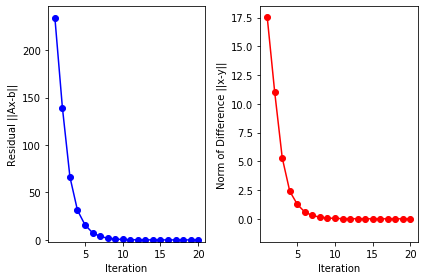

In [112]:
## jacobi

A = np.array([[8,0,1], [4, 8, 2],[2,5,9]])
b = np.array([[1],[2],[3]])
x_start = np.array([-10,-10,-10])

# Exact solution
y = np.array([12/125,18/125,29/125])

x,i = jacobi_iteration(A,b, x_start,0.0001)
iters = np.linspace(1,i+1, num =i+1)

#residual ||Ax - b||
residual = list(map(lambda x_i : np.linalg.norm(A.dot(x_i) - b.T), x.T))
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set(xlabel='Iteration', ylabel='Residual ||Ax-b||')
ax1.plot(iters, residual, '-bo')
ax1.set_ylim(ymin=-2)
# norm diff ||x-y||
norm_diff  = list(map(lambda x_i : np.linalg.norm(x_i - y), x.T))
ax2.plot(iters, norm_diff, '-ro')
ax2.set(xlabel='Iteration', ylabel='Norm of Difference ||x-y||')
ax2.set_ylim(ymin=-2)
fig.tight_layout()
fig.show()

We repreat the test using a larger sparse random system of $100$ variables and np.linalg.solve as reference.

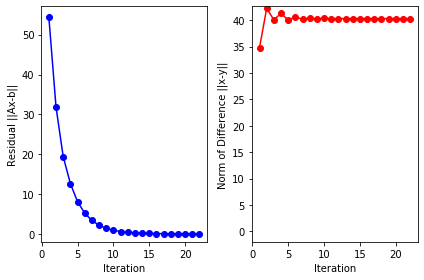

In [113]:
m = 100
A = np.random.randint(0,10, m * m)
# make around 10% of the array non-zero
A[A > 1] = 0
A = np.reshape(A, (m,m))
b = np.reshape(np.random.randint(0,10,m), (m,1))
# Make sure Diagonally dominant
for j in range(m):
  A[j,j] += 7 * np.random.randint(1,5)
x,i = jacobi_iteration(A,b,np.zeros(m), 0.0001)
# reference
x_np = np.linalg.solve(A,b)

iters = np.linspace(1,i+1, num =i+1)

#residual ||Ax - b||
residual = list(map(lambda x_i : np.linalg.norm(A.dot(x_i) - b.T), x.T))
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set(xlabel='Iteration', ylabel='Residual ||Ax-b||')
ax1.plot(iters, residual, '-bo')
ax1.set_ylim(ymin=-2)
# norm diff ||x-y||
norm_diff  = list(map(lambda x_i : np.linalg.norm(x_i - x_np), x.T))
ax2.plot(iters, norm_diff, '-ro')
ax2.set(xlabel='Iteration', ylabel='Norm of Difference ||x-y||')
ax2.set_ylim(ymin=-2)
fig.tight_layout()
fig.show()

## **Gauss-Seidel Iteration**

We perform the same evaluation as for the Jacobi iteration, with the same reference solutions.

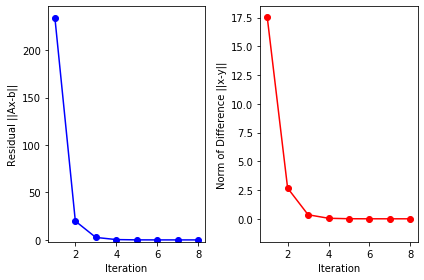

In [114]:
A = np.array([[8,0,1], [4, 8, 2],[2,5,9]])
b = np.array([[1],[2],[3]])
x_start = np.array([-10,-10,-10])

# Exact solution
y = np.array([12/125,18/125,29/125])

x,i = gauss_seidel_iteration(A,b, x_start,0.0001)
iters = np.linspace(1,i+1, num =i+1)

#residual ||Ax - b||
residual = list(map(lambda x_i : np.linalg.norm(A.dot(x_i) - b.T), x.T))

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set(xlabel='Iteration', ylabel='Residual ||Ax-b||')
ax1.plot(iters, residual, '-bo')
ax1.set_ylim(ymin=-2)
# norm diff ||x-y||
norm_diff  = list(map(lambda x_i : np.linalg.norm(x_i - y), x.T))
ax2.plot(iters, norm_diff, '-ro')
ax2.set(xlabel='Iteration', ylabel='Norm of Difference ||x-y||')
ax2.set_ylim(ymin=-2)
fig.tight_layout()
fig.show()

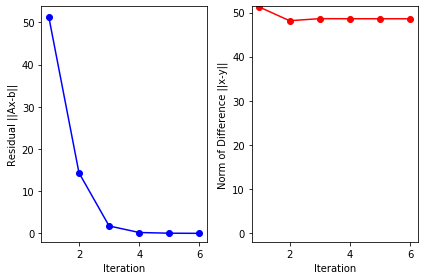

In [115]:
m = 100
A = np.random.randint(0,10, m * m)
# make around 10% of the array non-zero
A[A > 1] = 0
A = np.reshape(A, (m,m))
b = np.reshape(np.random.randint(0,10,m), (m,1))
# Make sure Diagonally dominant
for j in range(m):
  A[j,j] += 7 * np.random.randint(1,5)
x,i = gauss_seidel_iteration(A,b,np.zeros(m), 0.0001)
# reference
x_np = np.linalg.solve(A,b)

iters = np.linspace(1,i+1, num =i+1)

#residual ||Ax - b||
residual = list(map(lambda x_i : np.linalg.norm(A.dot(x_i) - b.T), x.T))
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set(xlabel='Iteration', ylabel='Residual ||Ax-b||')
ax1.plot(iters, residual, '-bo')
ax1.set_ylim(ymin=-2)
# norm diff ||x-y||
norm_diff  = list(map(lambda x_i : np.linalg.norm(x_i - b.T), x.T))
ax2.plot(iters, norm_diff, '-ro')
ax2.set(xlabel='Iteration', ylabel='Norm of Difference ||x-y||')
ax2.set_ylim(ymin=-2)
fig.tight_layout()
fig.show()

## **Newton's Method for Scalar Non-Linear Functions**

To test and evaluate Newton's method for scalar non-linear functions we use the following two functions,

\begin{align*}
f(x) &= e^x - x^2 + x - 3, \ \ & f'(x)  =\ & e^x -2x + 1, \\
g(x) &= sin(x) + \sqrt{x} + x^2 -3x-10, \ \ & g'(x) =\ & cos(x) + \frac{1}{2\sqrt{x}} + 2x - 3.
\end{align*}
Which according to Mathematica has approximate roots,
\begin{align*}
f(1.15768094975809) & \approx 0, \\
g(4.82377690848214) & \approx 0.
\end{align*}
We solve using our implementation, starting with $f(x)$ and then $g(x)$, below and plot the residual $|f(x)|$ and the difference $|x-y|$ where y is the Mathematica approximated root.

NEWTONS SCALAR ROOT f(x): 1.1576809569589128
REFERENCE ROOT      f(x): 1.15768094975809


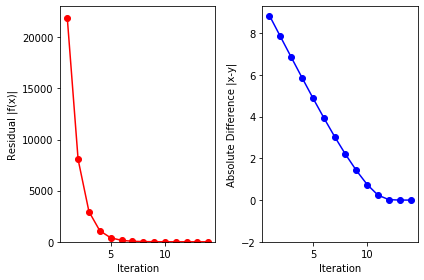

In [116]:
def f(x):
  # Has root around at 1.1576809497580918379
  return np.exp(x) - x*x + x - 3
def f_prim(x):
  return np.exp(x) - 2*x + 1

f_x,k  =newton_scalar(f,f_prim,10, 0.0001)
f_root = 1.15768094975809

print("NEWTONS SCALAR ROOT f(x): " + str(f_x[k]))
print("REFERENCE ROOT      f(x): " + str(f_root))

iters = np.linspace(1, k+1, num=k+1)

## test |x-y|
absdiff = list(map(lambda x_i: abs(x_i - f_root), f_x))

## |f(x)| residual
residual = list(map(lambda x_i: abs(f(x_i)), f_x))

# |f(x)|
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set(xlabel='Iteration', ylabel='Residual |f(x)|')
ax1.plot(iters, residual, '-ro')
ax1.set_ylim(ymin=-2)
# |x-y|
ax2.plot(iters, absdiff, '-bo')
ax2.set(xlabel='Iteration', ylabel='Absolute Difference |x-y|')
ax2.set_ylim(ymin=-2)
fig.tight_layout()
fig.show()

NEWTONS SCALAR ROOT g(x): 4.8237769085369395
REFERENCE ROOT      g(x): 4.82377690848214


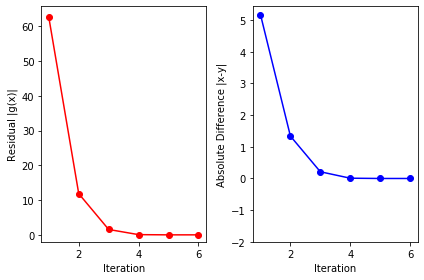

In [117]:
def g(x):
  return np.sin(x) + np.sqrt(x) + x*x - 3*x - 10
def g_prim(x):
  return np.cos(x) + 1 /(2*np.sqrt(x)) + 2*x - 3
  
g_x,k  =newton_scalar(g,g_prim,10, 0.0001)
g_root = 4.82377690848214

print("NEWTONS SCALAR ROOT g(x): " + str(g_x[k]))
print("REFERENCE ROOT      g(x): " + str(g_root))

iters = np.linspace(1, k+1, num=k+1)

## test |x-y|
absdiff = list(map(lambda x_i: abs(x_i - g_root), g_x))

## |f(x)| residual
residual = list(map(lambda x_i: abs(g(x_i)), g_x))

# |f(x)|
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set(xlabel='Iteration', ylabel='Residual |g(x)|')
ax1.plot(iters, residual, '-ro')
ax1.set_ylim(ymin=-2)
# |x-y|
ax2.plot(iters, absdiff, '-bo')
ax2.set(xlabel='Iteration', ylabel='Absolute Difference |x-y|')
ax2.set_ylim(ymin=-2)
fig.tight_layout()
fig.show()

The implementation seem to be correct in both cases.

## **Newton's Method for Non-Linear Systems**

To test and evaluate Newton's Method for non-linear systems we use the following two systems,
$$
f(x,y,z,w) = \begin{cases}
-x + xy - 1& =  0, \\
y + zw  + 1 &= 0, \\
z + 2& = 0, \\
w*w - w - 2 &= 0.
\end{cases}
$$
And,
$$
g(x,y) = \begin{cases}
x + y + 1 &= 0, \\
x^2 + y^2 + y &= 0.
\end{cases}
$$
As our implementation use the analytical Jacobian we derive and get,
$$
D_f = \begin{pmatrix}
-1 + y & x & 0 & 0 \\
0 & 1 & w & z \\
0 &0 & 1& 0 \\
0 & 0 & 0 & 2w - 1
\end{pmatrix}, \ D_g = \begin{pmatrix}
1 & 1 \\
2x & 2y + 1
\end{pmatrix}.
$$

We start our evaluation with $f$, solving the system using Mathematica gives the two solutions,
\begin{align*}
&w = -1, \ x = -1/4, \ y = -3, \ z = -2, \text{ and} \\
&w = 2, \ x = 1/2,\ y = 3,\ z = -2.
\end{align*}
We solve and plot the residual $\Vert f(x)\Vert$ and the norm of the difference $\Vert x-y\Vert$ for the solution $y$, however as there are two solutions we must first check which one our implementation finds.

In [118]:

def f(x):
  res = np.zeros((4,1))
  res[0,0] = -x[0] + x[0]*x[1] - 1
  res[1,0] = x[1] + x[2]*x[3] + 1
  res[2,0] = x[2] + 2
  res[3,0] = x[3]*x[3] - x[3] - 2 
  return res

def D_f(x):
  res = np.zeros((4,4))
  res[0,0] = x[1] - 1
  res[0,1] = x[0]
  res[0,2] = 0
  res[0,3] = 0
  res[1,0] = 0
  res[1,1] = 1
  res[1,2] = x[3]
  res[1,3] = x[2]
  res[2,0] = 0
  res[2,1] = 0
  res[2,2] = 1
  res[2,3] = 0
  res[3,0] = 0
  res[3,1] = 0
  res[3,2] = 0
  res[3,3] = 2*x[3] - 1
  return res

x,i = newton_system(f,D_f, np.zeros(4), 0.0001)
print("Solution f(x) found: " + str(x[:,i]))

Solution f(x) found: [-0.24999999 -3.         -2.         -1.        ]


The first root stated above is found.

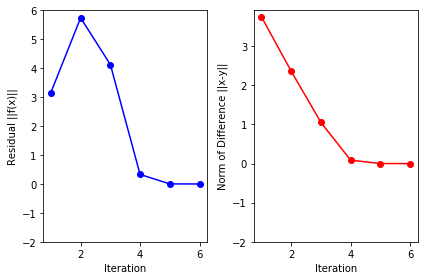

In [119]:
f_root = np.array([-1/4, -3, -2, -1])
f_x, i = newton_system(f,D_f, np.zeros(4), 0.0001)
iters = np.linspace(1,i+1, num =i+1)

#residual ||f(x)||
residual = list(map(lambda x_i : np.linalg.norm(f(x_i)), x.T))
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set(xlabel='Iteration', ylabel='Residual ||f(x)||')
ax1.plot(iters, residual, '-bo')
ax1.set_ylim(ymin=-2)
# norm diff ||x-y||
norm_diff  = list(map(lambda x_i : np.linalg.norm(x_i - f_root), x.T))
ax2.plot(iters, norm_diff, '-ro')
ax2.set(xlabel='Iteration', ylabel='Norm of Difference ||x-y||')
ax2.set_ylim(ymin=-2)
fig.tight_layout()
fig.show()


We continue with the second system $g$, solving using Mathematica gives two solutions,
$$
x =-\frac{1}{2},\ y = -\frac{1}{2}, \text{ and }, x = 0, y = -1.
$$
Solving with our implementation gives us,

In [120]:
def g(x):
  res = np.zeros((2,1))
  res[0,0] = x[0]+ x[1] + 1
  res[1,0] = x[0]*x[0] + x[1]*x[1] + x[1]
  return res

def D_g(x):
  res = np.zeros((2,2))
  res[0,0] = 1
  res[0,1] = 1
  res[1,0] = 2*x[0]
  res[1,1] = 2*x[1] + 1
  return res

x,i = newton_system(g,D_g, np.zeros(2), 0.0001)
print("Solution g(x) found: " + str(x[:,i]))

Solution g(x) found: [-0.50000763 -0.49999237]


I.e. the first solution give above.

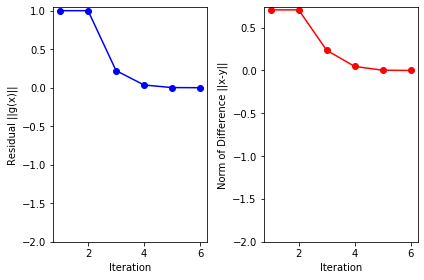

In [121]:
g_root = np.array([-1/2, -1/2])
g_x, i = newton_system(g,D_g, np.zeros(2), 0.0001)
iters = np.linspace(1,i+1, num =i+1)

#residual ||g(x)||
residual = list(map(lambda x_i : np.linalg.norm(g(x_i)), x.T))
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set(xlabel='Iteration', ylabel='Residual ||g(x)||')
ax1.plot(iters, residual, '-bo')
ax1.set_ylim(ymin=-2)
# norm diff ||x-y||
norm_diff  = list(map(lambda x_i : np.linalg.norm(x_i - g_root), x.T))
ax2.plot(iters, norm_diff, '-ro')
ax2.set(xlabel='Iteration', ylabel='Norm of Difference ||x-y||')
ax2.set_ylim(ymin=-2)
fig.tight_layout()
fig.show()

Our implementation appear to be working well for both systems.

# **Discussion**

All implemented algortihms appear to be working as expected.

### Jacobi Iteration and Gauss-Seidel Iteration
From the given system both the implementations appear to be working very well, both the residual and norm of the error decreases each iteration, and very quickly at that. However the system is very small.

For the randomized system of $100$ variables the residual quickly approaches 0, while the norm of the iteration error does not decrease. This is likely due to using np.linalg.solve as the "exact" solution, since it may not be any more precise than our.

The biggest difference between the two methods is the convergence speed with Gauss-Seidel requiring less then half the iterations of the Jacobi method for both systems, however the two $100$ variable systems was different for the two tests.

### Newton's Method for Scalar Non-Linear Functions
For both evaluated functions Newton's method the normed difference and the residual converges to zero very fast. Likely due to the quadratic convergence rate of Newton's method.

### Newton's Method for Non-Linear Systems
We see that Newton's method converges to zero fast for both systems. However the systems are quite simple as we encountered some problems when constructing example systems. The method requires the evaluated Jacobian to be non-singular each iteration, and as the system complexity grows the easier it appears to be to encounter an iteration where the Jacobian is singular.
